In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(os.listdir("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk"))

['HomeCredit_columns_description.csv', 'application_test.csv', 'POS_CASH_balance.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'sample_submission.csv', 'previous_application.csv', 'loan_data_of.csv']


In [3]:
# application for train

app_train = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk/application_train.csv")
print("Training data shape: ", app_train.shape)

Training data shape:  (307511, 122)


In [4]:
# Application for test

app_test = pd.read_csv("/content/drive/MyDrive/Loan_Prediction_dataMining/dataset/home-credit-default-risk/application_test.csv")
print("Test data shape: ", app_test.shape)

Test data shape:  (48744, 121)


In [5]:
# Function to calculate missing values by column# Funct
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# Missing values

missing_values = missing_values_table(app_train)
missing_values.head(25)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [7]:
# numeric variable
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [8]:
le = LabelEncoder()
le_count = 0

for col in app_train:
  if app_train[col].dtype == 'object':
    if len(list(app_train[col].unique())) <=2:
      le.fit(app_train[col])

      app_train[col] = le.transform(app_train[col])
      app_test[col] = le.transform(app_test[col])

      le_count += 1

print('%d columns were label encoded' % le_count)

3 columns were label encoded


In [9]:
# one-hot encoding
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print("Training Features shape: ", app_train.shape)
print("Testing Features shape: ", app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [10]:
train_labels = app_train['TARGET']

 # to keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print("Testing Features shape: ", app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


In [11]:
app_train.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,TARGET
0,100002,0,0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0,0,0,0,0,1,0,1,0,1
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,1,0,0,0,0,0,0,1,0,0
2,100004,1,1,1,0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0,0,0,0,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split
train, test  = train_test_split(app_train, test_size = 0.30,
                                                    random_state = 1)

In [13]:
X_train = train.drop(columns = ['TARGET'])
y_train = train.iloc[:, -1]

In [14]:
X_test = test.drop(columns = ['TARGET'])
y_test = test.iloc[:, -1]

<Axes: ylabel='Frequency'>

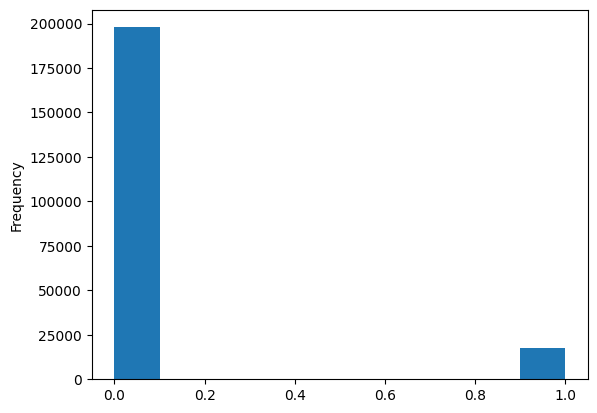

In [15]:
y_train.astype(int).plot.hist()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Drop the target from the training data

train = X_train.copy()

# Feature names
features = list(train.columns)

# Copy of the testing data
test = X_test.copy()

# Median imputation of missing values
imputer = SimpleImputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (215257, 239)
Testing data shape:  (92254, 239)


In [17]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (395798, 239)
After OverSampling, the shape of train_y: (395798,) 

After OverSampling, counts of label '1': 197899
After OverSampling, counts of label '0': 197899


In [ ]:
from sklearn.linear_model import LogisticRegression

log_class = LogisticRegression()
log_class.fit(X_train_res, y_train_res.ravel())

LogisticRegression()

In [ ]:
from sklearn.metrics import*
y_pred = log_class.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     84787
           1       0.16      0.65      0.26      7467

    accuracy                           0.70     92254
   macro avg       0.56      0.68      0.53     92254
weighted avg       0.89      0.70      0.76     92254



In [ ]:
y_pred_prob = log_class.predict_proba(test)[:, 1]
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7366277125463432

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report
model = LGBMClassifier()
model.fit(X_train_res, y_train_res)

LGBMClassifier()

In [ ]:
y_pred = model.predict(test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84787
           1       0.51      0.02      0.03      7467

    accuracy                           0.92     92254
   macro avg       0.72      0.51      0.49     92254
weighted avg       0.89      0.92      0.88     92254



In [ ]:

# Compute the false positive rate (FPR)
# and true positive rate (TPR) for different classification thresholds
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7366277125463432

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

In [20]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [21]:
y_pred_prob = clf.predict_proba(test)[:,1]
# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
roc_auc

0.7004965004759901